In [1]:
from GaussianNB import GaussianNB
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

## Load data

In [2]:
df = pd.read_csv('iris.csv', header=None)
df = df.sample(frac=1)

In [3]:
df.head()

,0,1,2,3,4
133,6.3,2.8,5.1,1.5,Iris-virginica
82,5.8,2.7,3.9,1.2,Iris-versicolor
39,5.1,3.4,1.5,0.2,Iris-setosa
20,5.4,3.4,1.7,0.2,Iris-setosa
95,5.7,3.0,4.2,1.2,Iris-versicolor


In [4]:
df[4] = df[4].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

In [5]:
df.head()

,0,1,2,3,4
133,6.3,2.8,5.1,1.5,2
82,5.8,2.7,3.9,1.2,1
39,5.1,3.4,1.5,0.2,0
20,5.4,3.4,1.7,0.2,0
95,5.7,3.0,4.2,1.2,1


## Create train-test splits

In [6]:
X_train = df.iloc[:int(len(df) * 2/3), :-1].as_matrix()
Y_train = df.iloc[:int(len(df) * 2/3), -1].as_matrix()

X_test = df.iloc[int(len(df) * 2/3):, :-1].as_matrix()
Y_test = df.iloc[int(len(df) * 2/3):, -1].as_matrix()

### Train Classifier

In [7]:
NB_classifier = GaussianNB()
NB_classifier.train(X_train, Y_train)

### Predict / Test accuracy

In [8]:
total_test = X_test.shape[0]
correct = 0

for i in range(total_test):
    y_hat = NB_classifier.predict(X_test[i])
    y = Y_test[i]
    if y_hat == y:
        correct += 1
    else:
        print("prediction:", y_hat, "correct:", y)

prediction: 2 correct: 1


### Awesome!

In [9]:
print("Accuracy:", correct / total_test)

Accuracy: 0.98


## Now lets train the classifier using only 2 predictors. This will let us easily plot the decision-boundary of the Gaussian NB classifier.

### Choose only 2 predictors (features)

In [10]:
df = pd.read_csv('iris.csv', header=None)
df[4] = df[4].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})
df = df.sample(frac=1)
df = df.iloc[:, [0, 2, 4]]

In [11]:
df.head()

,0,2,4
101,5.8,5.1,2
45,4.8,1.4,0
91,6.1,4.6,1
146,6.3,5.0,2
142,5.8,5.1,2


### Split data & train

In [12]:
X_train = df.iloc[:int(len(df) * 2/3), :-1].as_matrix()
Y_train = df.iloc[:int(len(df) * 2/3), -1].as_matrix()

X_test = df.iloc[int(len(df) * 2/3):, :-1].as_matrix()
Y_test = df.iloc[int(len(df) * 2/3):, -1].as_matrix()

In [13]:
NB_classifier = GaussianNB()
NB_classifier.train(X_train, Y_train)

### Plot datapoints

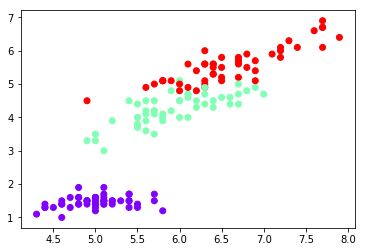

In [14]:
plt.scatter(x=df[0], y=df[2], c=df[4], cmap=cm.get_cmap('rainbow'))
plt.show()

## Create scatter matrix

In [15]:
xx, yy = np.meshgrid(np.linspace(df[0].min()-1, df[0].max()+1, 50), np.linspace(df[2].min()-1, df[2].max()+1, 50))

In [22]:
xx

array([[ 3.3       ,  3.41428571,  3.52857143, ...,  8.67142857,
         8.78571429,  8.9       ],
       [ 3.3       ,  3.41428571,  3.52857143, ...,  8.67142857,
         8.78571429,  8.9       ],
       [ 3.3       ,  3.41428571,  3.52857143, ...,  8.67142857,
         8.78571429,  8.9       ],
       ..., 
       [ 3.3       ,  3.41428571,  3.52857143, ...,  8.67142857,
         8.78571429,  8.9       ],
       [ 3.3       ,  3.41428571,  3.52857143, ...,  8.67142857,
         8.78571429,  8.9       ],
       [ 3.3       ,  3.41428571,  3.52857143, ...,  8.67142857,
         8.78571429,  8.9       ]])

In [16]:
xx.ravel()

array([ 3.3       ,  3.41428571,  3.52857143, ...,  8.67142857,
        8.78571429,  8.9       ])

In [17]:
yy.ravel()

array([ 0. ,  0. ,  0. , ...,  7.9,  7.9,  7.9])

In [18]:
np.c_[xx.ravel(), yy.ravel()]

array([[ 3.3       ,  0.        ],
       [ 3.41428571,  0.        ],
       [ 3.52857143,  0.        ],
       ..., 
       [ 8.67142857,  7.9       ],
       [ 8.78571429,  7.9       ],
       [ 8.9       ,  7.9       ]])

In [19]:
scatter_matrix = np.c_[xx.ravel(), yy.ravel()]

In [20]:
Y_hat = []
for x in scatter_matrix:
    Y_hat.append(NB_classifier.predict(x))
Y_hat = np.array(Y_hat)

## Plot decision boundary

As the countour plot shows, the decision boundary of the Gaussian Naive-Bayes classifier is not linear. It is a quadratic piecewise polynomial.

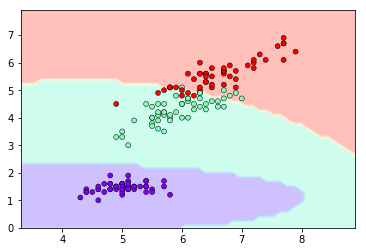

In [21]:
plt.contourf(xx, yy, Y_hat.reshape(xx.shape), cmap=cm.get_cmap('rainbow'), alpha=0.3, antialiased=True)
plt.scatter(x=df[0], y=df[2], c=df.iloc[:, -1], cmap=cm.get_cmap('rainbow'), s=25, edgecolor='black', linewidths=0.5, marker='o')
plt.show()